In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cocoa-beans-image-dataset/Cocoa Beans/Whole_Beans_Cocoa/WB01_01.jpg
/kaggle/input/cocoa-beans-image-dataset/Cocoa Beans/Whole_Beans_Cocoa/WB01_20.jpg
/kaggle/input/cocoa-beans-image-dataset/Cocoa Beans/Whole_Beans_Cocoa/WB01_66.jpg
/kaggle/input/cocoa-beans-image-dataset/Cocoa Beans/Whole_Beans_Cocoa/WB01_29.jpg
/kaggle/input/cocoa-beans-image-dataset/Cocoa Beans/Whole_Beans_Cocoa/WB01_25.jpg
/kaggle/input/cocoa-beans-image-dataset/Cocoa Beans/Whole_Beans_Cocoa/WB01_57.jpg
/kaggle/input/cocoa-beans-image-dataset/Cocoa Beans/Whole_Beans_Cocoa/WB01_64.jpg
/kaggle/input/cocoa-beans-image-dataset/Cocoa Beans/Whole_Beans_Cocoa/WB01_09.jpg
/kaggle/input/cocoa-beans-image-dataset/Cocoa Beans/Whole_Beans_Cocoa/WB01_04.jpg
/kaggle/input/cocoa-beans-image-dataset/Cocoa Beans/Whole_Beans_Cocoa/WB01_07.jpg
/kaggle/input/cocoa-beans-image-dataset/Cocoa Beans/Whole_Beans_Cocoa/WB01_10.jpg
/kaggle/input/cocoa-beans-image-dataset/Cocoa Beans/Whole_Beans_Cocoa/WB01_49.jpg
/kaggle/input/co

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [7]:
#  parameters
img_width, img_height = 224, 224
batch_size = 30
epochs = 100
num_classes = 6
input_shape = (img_height, img_width, 3)

#  dataset
data_dir = '/kaggle/input/cocoa-beans-image-dataset/Cocoa Beans'

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

# Print out class indices
print(train_generator.class_indices)

# number of classes
print("Number of classes:", len(train_generator.class_indices))

# number of images
print("Number of images:", train_generator.samples)

# class labels of the first batch
print("Class labels of the first batch:", train_generator.labels[:batch_size])


Found 614 images belonging to 6 classes.
{'Bean_Fraction_Cocoa': 0, 'Broken_Beans_Cocoa': 1, 'Fermented_Cocoa': 2, 'Moldy_Cocoa': 3, 'Unfermented_Cocoa': 4, 'Whole_Beans_Cocoa': 5}
Number of classes: 6
Number of images: 614
Class labels of the first batch: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [8]:
# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


In [10]:
# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the convolutional base
for layer in base_model.layers:
    layer.trainable = False

# Create custom top layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Use 'softmax' activation for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1)



58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [19]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    callbacks=[early_stopping, reduce_lr])


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 241ms/step - accuracy: 0.8927 - loss: 0.2392 - learning_rate: 0.0010
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.8667 - loss: 0.2962 - learning_rate: 0.0010
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 251ms/step - accuracy: 0.8979 - loss: 0.2251 - learning_rate: 0.0010
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - accuracy: 0.8333 - loss: 0.3226 - learning_rate: 0.0010
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 264ms/step - accuracy: 0.8817 - loss: 0.2963 - learning_rate: 0.0010
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - accuracy: 0.9667 - loss: 0.1245 - learning_rate: 0.0010
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 235ms/step - accuracy: 0.9402 - loss: 0.2221 - learning_rate: 0.0010
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.9000 - loss: 0.2097 - learning_rate: 0.0010
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 237ms/step - accuracy: 0.9342 - loss: 0.1656 - learning_rate: 0.0010
E

In [20]:
# Calculate average efficiency and loss
average_accuracy = sum(history.history['accuracy']) / len(history.history['accuracy'])
average_loss = sum(history.history['loss']) / len(history.history['loss'])

# Print the average efficiency and loss
print("Average training accuracy:", average_accuracy)
print("Average training loss:", average_loss)


Average training accuracy: 0.9151057010889053
Average training loss: 0.21823113579303027


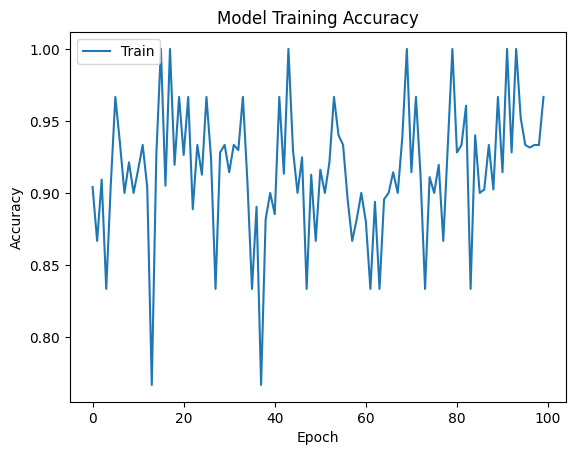

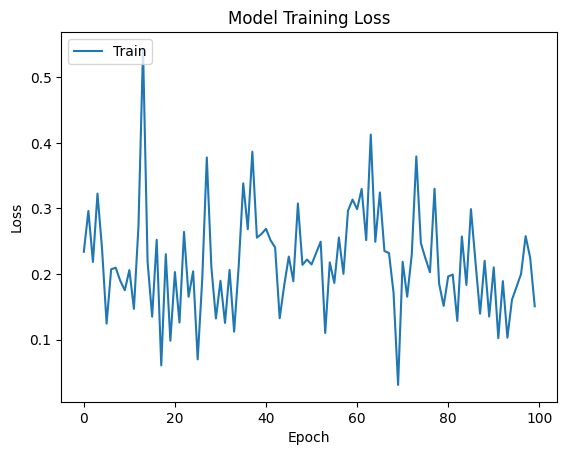

In [22]:
import matplotlib.pyplot as plt

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Plot training loss
plt.plot(history.history['loss'])
plt.title('Model Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()


21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 302ms/step


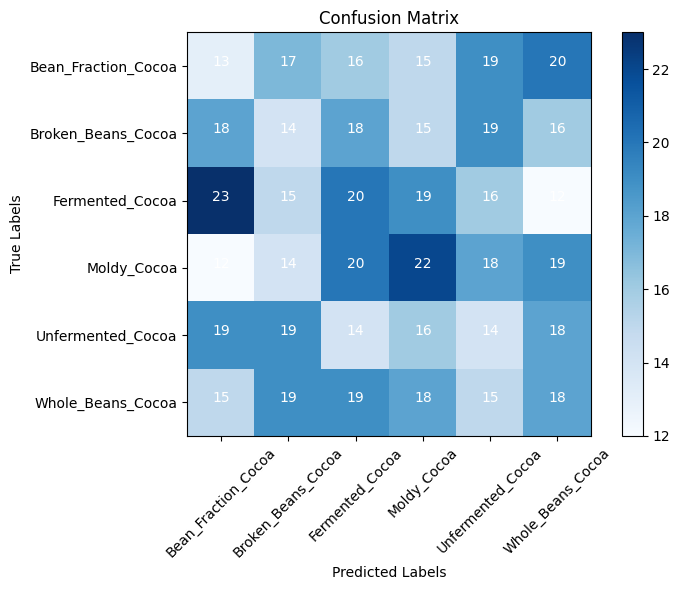

                     precision    recall  f1-score   support

Bean_Fraction_Cocoa       0.13      0.13      0.13       100
 Broken_Beans_Cocoa       0.14      0.14      0.14       100
    Fermented_Cocoa       0.19      0.19      0.19       105
        Moldy_Cocoa       0.21      0.21      0.21       105
  Unfermented_Cocoa       0.14      0.14      0.14       100
  Whole_Beans_Cocoa       0.17      0.17      0.17       104

           accuracy                           0.16       614
          macro avg       0.16      0.16      0.16       614
       weighted avg       0.16      0.16      0.16       614



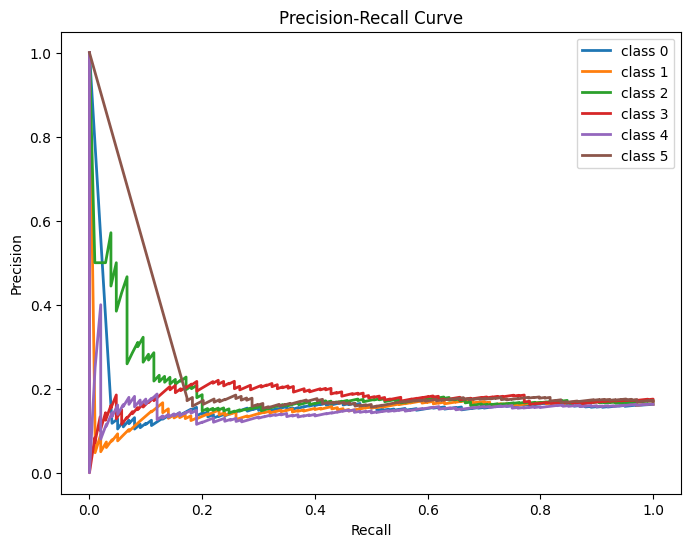

In [27]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Predict classes
y_pred = model.predict(train_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = train_generator.classes

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
tick_marks = np.arange(len(train_generator.class_indices))
plt.xticks(tick_marks, train_generator.class_indices, rotation=45)
plt.yticks(tick_marks, train_generator.class_indices)
for i in range(len(train_generator.class_indices)):
    for j in range(len(train_generator.class_indices)):
        plt.text(j, i, str(conf_matrix[i][j]), horizontalalignment='center', color='white' if conf_matrix[i][j] > conf_matrix.max() / 2 else 'black')
plt.tight_layout()
plt.show()

# Classification report
print(classification_report(y_true, y_pred_classes, target_names=train_generator.class_indices.keys()))

# Calculate precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_true == i, y_pred[:, i])
    average_precision[i] = average_precision_score(y_true == i, y_pred[:, i])

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# Function to plot activation histograms
def plot_activation_histograms(model, X_test):
    # Create a model that outputs activations for all layers
    layer_outputs = [layer.output for layer in model.layers]
    activation_model = Model(inputs=model.input, outputs=layer_outputs)
    
    # Get activations for a sample input
    activations = activation_model.predict(X_test[:1])
    
    # Plot histograms for each layer
    plt.figure(figsize=(10, 6))
    for i, activation in enumerate(activations):
        if len(activation.shape) == 4:  # Checking if activation is from a convolutional layer
            # Flatten the activations for plotting
            flat_activations = activation.flatten()
            plt.subplot(4, 8, i + 1)
            plt.hist(flat_activations, bins=20)
            plt.title(f'Layer {i}')
            plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function with your model and test data
plot_activation_histograms(model, X_test)


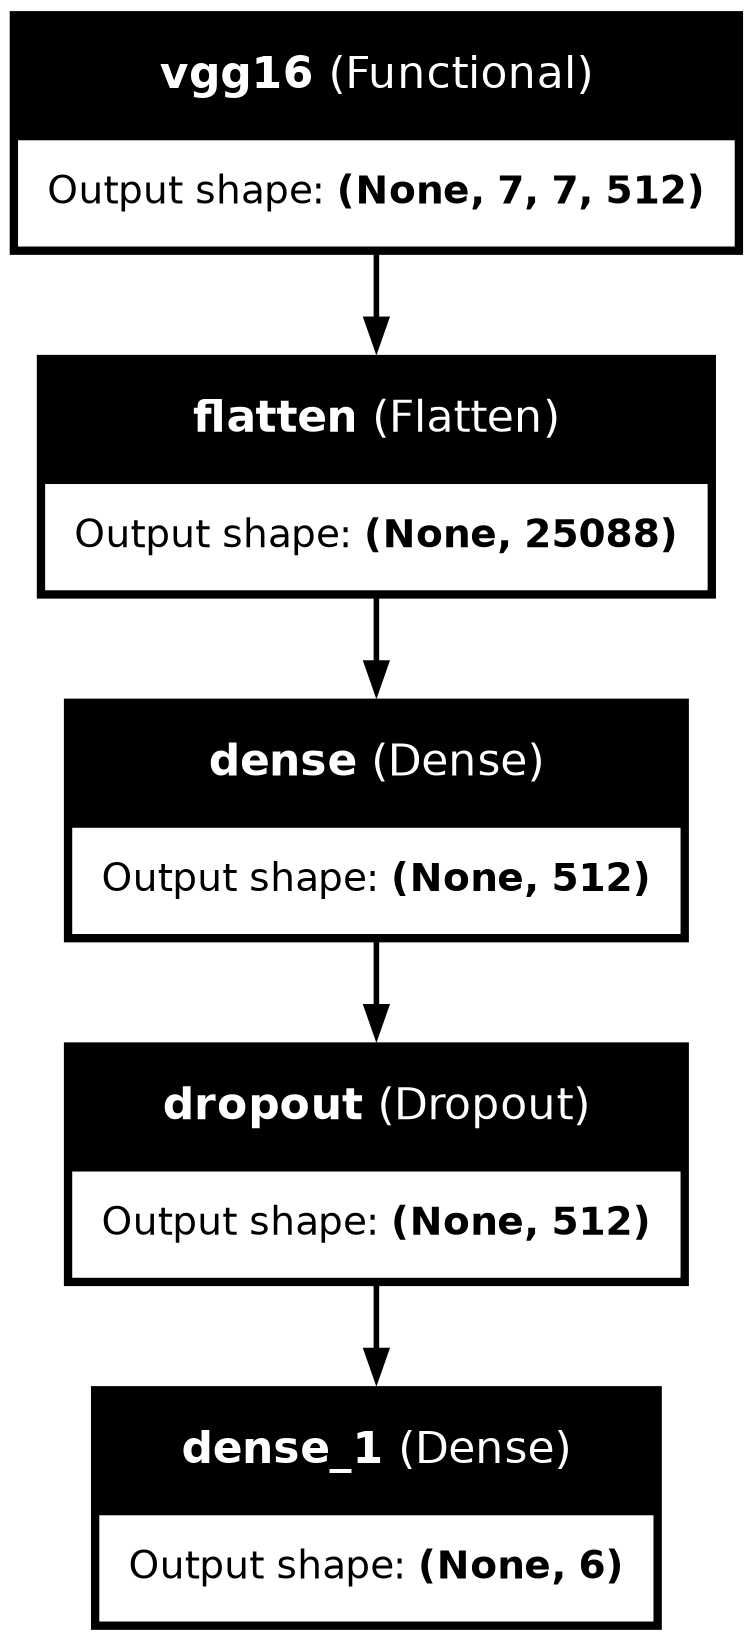

In [31]:
from tensorflow.keras.utils import plot_model

# Plot the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
